## An NLP Framework for Measuring Job Competencies

### Dissertation Project
### MSc in Big Data Analytics and Artificial Intelligence
Eoin O'Callaghan 2023

#### Load the data

The main datafile contains text responses from job applicants and evaluation ratings provided by humans.
Additionally, a BARS was created and the text from this is also loaded.

In [ ]:
!python --version

Python 3.10.12


In [ ]:
pip install POT

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 790.0/790.0 kB 10.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/ATU course/dissertation/"
original_data = pd.read_csv(f"{file_path}job_simulation_responses.csv")
bars_text = pd.read_csv(f"{file_path}BARS_v2.0.csv")

In [ ]:
original_data

,response_id,rating_chooses_appropriate_action,rating_commits_to_action,rating_gathers_information,rating_identifies_issues_opportunities,rating_interprets_information,rating_involves_others,rating_decision_making_final_score,text_exercise_4,text_exercise_5,...,text_exercise_11,text_exercise_12,text_exercise_13,text_exercise_14,text_exercise_15,text_exercise_16,text_exercise_17,text_exercise_18,text_exercise_19,text_exercise_final
0,NlmLRJzhnNt,2.0,2,2,2.0,2,3.0,2,NaN,"Hi Tracy, This sounds very ionteresting, prior...",...,NaN,NaN,Kim/Taylor: At this point you are far more fam...,NaN,NaN,"Taylor, POlease hold off on collecting hand wr...",NaN,"Taylor, Please hold off on contact Tom Weedler...","Kim, Please meet with HR Liang and Tracy to fi...",See below for answers.Original Message----- Fr...
1,mQoZghwfMUT,4.0,3,4,3.0,4,2.0,6,NaN,"Hi Tracy, I am happy to see we have a self mot...",...,NaN,NaN,NaN,NaN,NaN,"Hi Taylor, Stop your investigation immediately...",NaN,"Hi Taylor, It is possible that everything is a...","Liang, Stop what you are doing. First of all, ...",Original Message----- From: Assessment Adminis...
2,FjIOCrTtDgF,2.0,2,2,2.0,2,2.0,2,NaN,NaN,...,"Great, I think room BP07 AT 12:00pm to 1:00pm ...",Thank you I see something I can do. Thank You...,NaN,Thank you for keeping me in the know. Keep up ...,NaN,NaN,Thank You I'll take care of it. Thank You Jami...,NaN,"Wait , Let me go talk to J.J . before you do a...","No, Focus and Team work I need to talk with th..."
3,CQGLdZnCHcZ,3.0,3,3,2.0,2,2.0,3,NaN,NaN,...,Hi Foster let have the meeting at 2:00 to 3:00...,"Jennifer the infomation you sent me, it looks ...",NaN,", Hi Paxton we can get together on april 20 ar...",Hi Isaac let me see what kind of schadule I ha...,NaN,Hi Bern I think is better is we take both to l...,NaN,H Daisha you did the right thing thank you for...,NaN
4,LERqIHLgqYm,3.0,3,2,3.0,2,2.0,3,NaN,NaN,...,Shea Based on my recent calendar revisions and...,Jennifer Thank you for the March repair report...,NaN,JJ Thank you for all your efforts and the info...,"Isaac By insatlling the software on the 15th, ...",NaN,NaN,NaN,Vic I suggest you approachHR before taking thi...,Original Message----- From: Assessment Adminis...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,XmFXbwOnhYC,2.0,2,2,3.0,3,2.0,2,NaN,"Dear Tracey,I wanted to take the time to thank...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Taylor,Pls include the quality team here to fi...",NaN,NaN
1462,IpqihBAIrdh,4.0,4,3,4.0,4,4.0,6,NaN,Hi Tracy - thanks for your note and for sharin...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hi Taylor - thanks for bringing this to my att...,",",NaN
1463,uDUdxHafrcK,3.0,3,2,3.0,2,2.0,2,NaN,"Dear Tracey,Thanks for sharing the data.We do ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dear Taylor,Thank you for your email.I believe...",NaN,NaN
1464,RWDsTwgzAfN,4.0,3,3,4.0,3,4.0,6,NaN,"Hi Tracy, Thanks for sharing customer satisfac...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Hi Taylor, Thanks for bringing upto my notice....",NaN,NaN


In [ ]:
bars_text

,subcompetency,bars_high,bars_low
0,gathers_information,Effectively and proactively gathers comprehens...,Gathers irrelevant data. Does not seek multipl...
1,interprets_information,Accurately interprets the information availabl...,Misinterprets the available information genera...
2,identifies_issues_and_opportunities,Generates a range of viable options. Proactive...,Misses opportunities. Fails to consider the co...
3,includes_others,Seeks input from other stakeholders to incorpo...,Excludes others from decision-making. Does not...
4,chooses_appropriate_action,Makes sound and reasoned decisions. Chooses th...,Makes uninformed choices. Chooses inappropriat...
5,commits_to_action,Takes decisive action. Takes responsibility fo...,Postpones and delays deciding on a course of a...


## Data cleaning
### 1. Removing question prompts.

There are some repeated strings in the text which provided structure to the exercise or gave specific questions for them to answer. These are not part of the responses. For example "*What were the three most important and the three least important e-mails to handle?*"

These repeated strings are removed to leave only the respondent's text to be used in the analysis.

In [ ]:
# Create a dictionary containing the strings to be removed

remove_dict = {
    "remove_pattern_1": r'Original Message----- From: Assessment Administrator Sent:.*?Cc:',
    "remove_pattern_2": r'Subject : RESPONSE REQUIRED: About your day',
    "remove_pattern_3": r'This e-mail contains some final questions for you. Your answers to these questions will help in the evaluation of your performance by providing a better understanding of your approach and rationale. It is important that you provide complete and thorough answers to the questions below.  For your reference, a list of messages you received today is shown after question 4.',
    "remove_pattern_4": r'1. Please list the major categories of issues or problems facing Customer Service Team 5 of Soundproof Solutions. Why is each an issue or a problem\?',
    "remove_pattern_5": r'2. What were the three most important messages you considered the highest priorities to handle\? Why\?',
    "remove_pattern_6": r'3. List specific examples \(if any\) of instances where you detected a relationship between two of the messages you received in your inbox.',
    "remove_pattern_7": r'For example, when you decided how respond to one message, did you consider information provided not only in that message, but in other message\(s\)\?',
    "remove_pattern_8": r'4. Describe what additional information you would have liked to have in order to have a better or clearer understanding of the messages and challenges presented to you today.',
    "remove_pattern_10": r'The messages you received today included:  Weedler Contracting: A customer is suspected of abusing the companys replacement policies',
    "remove_pattern_11": r'Eluto Caplanu: Someone has placed an insulting message on Elutos lunch',
    "remove_pattern_12": r'Effective mentoring pays dividends: Taylor mentored Jerry Winters and presents the results',
    "remove_pattern_13": r'Customer satisfaction insights: Tracy Hurdle reports research on customer satisfaction',
    "remove_pattern_14": r'Promotion: There is new room in the budget to promote a part-time employee to full-time',
    "remove_pattern_15": r'Professional conduct: A salesperson complains that representatives behave unprofessionally',
    "remove_pattern_16": r'Theft of company-confidential information: A security guard suspects an associate of improper activity',
    "remove_pattern_17": r'Bench strength: Representatives must be signed up for training per company policy',
    "remove_pattern_18": r'quietPAPER ONE: A new product is faulty and will start to produce complaints in two weeks',
    "remove_pattern_19": r'Paperless office: A plan is presented to replace paper files',
    "remove_pattern_20": r'Installation in Sales: Sales requests scheduling soundproofing for their area, and a meeting with a customer',
    "remove_pattern_21": r'Feedback process: Kim proposes a way to efficiently deal with customer feedback',
    "remove_pattern_22": r'Fletcher Systems: An unhappy customer demands reinstallation and a meeting',
    "remove_pattern_23": r'Subject : About your day \(1 of 2\)',
    "remove_pattern_24": r'This e-mail and the one that follows contain some final questions for you.',
    "remove_pattern_25": r'Your answers to these questions will help us evaluate your performance by giving us a better understanding of your approach to the challenges you faced.',
    "remove_pattern_26": r'It is therefore very important that you provide complete and thorough answers to the questions below and on the e-mail that follows.',
    "remove_pattern_27": r'To reply to the questions in these messages, simply click the Reply button above and enter your responses in the form of a reply e-mail.',
    "remove_pattern_28": r'1. Did you handle each challenge in the order you received it, or did you handle them another way\? Please describe your approach.',
    "remove_pattern_29": r'2. Please list the major categories of issues or problems facing Final Assembly in the Bridgeport facility of Soundproof Solutions.',
    "remove_pattern_30": r'3. Describe why each entry in Question 2 is an issue or problem.',
    "remove_pattern_31": r'Subject : About your day \(2 of 2\)',
    "remove_pattern_32": r'Following are some of the e-mails that you received today, along with some questions about how you approached them.',
    "remove_pattern_33": r'Your answers to these questions will help us evaluate your performance by giving us a better understanding of your approach to the challenges you faced.',
    "remove_pattern_34": r'To respond, simply click the Reply button above and enter your answers in the form of a reply e-mail.',
    "remove_pattern_35": r'1. What were the three most important and the three least important e-mails to handle\?',
    "remove_pattern_36": r'2. Why did you feel that the e-mails you rated as most important were critical\?',
    "remove_pattern_37": r'3.Todays assessment provided you with background information about Soundproof Solutions and also presented thechallenging messages listed above.',
    "remove_pattern_38": r'Were there situations where information from one source/challenge helped you to better understand and address anotherchallenge\?',
    "remove_pattern_39": r'If so, please list specific examples of theseinstances \(Example: Message X related to Message Z, Company Policies related to Message Y, etc.\).'
}


In [ ]:
# Convert all the text exercise columns to string

cols = original_data.columns[original_data.columns.str.contains('text_exercise_')]
data = original_data.copy() # create a copy of the original data
data[cols] = data[cols].fillna('')
data[cols] = data[cols].astype(str)

In [ ]:
# Replace "$0" with an empty string in the specified columns
data[cols] = data[cols].applymap(lambda x: str(x).replace('$0', ' '))

In [ ]:
import re

# Function to remove strings
def remove_strings_func(text, patterns):
    for name, pattern in patterns.items():
        text = re.sub(pattern, '', text)
    return text

# Apply the function to remove strings
data['text_exercise_final_clean'] = data['text_exercise_final'].apply(lambda x: remove_strings_func(x, remove_dict))

### 2. Spelling correction
The programme used to collect or process the responses from participants inadvertently concatenated words together in many cases. Additionally, respondents made spelling mistakes.

The text data was processed to split concatenated words and autocorrect spelling.  

In [ ]:
!apt-get install aspell
!apt-get install libaspell-dev
!pip install aspell-python-py3
!pip install wordninja

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aspell-en dictionaries-common libaspell15 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common libaspell15 libtext-iconv-perl
0 upgraded, 5 newly installed, 0 to remove and 15 not upgraded.
Need to get 911 kB of archives.
After this operation, 3,823 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libtext-iconv-perl amd64 1.7-7build3 [14.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libaspell15 amd64 0.60.8-4build1 [325 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 dictionaries-common all 1.28.14 [185 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 aspell amd64 0.60.8-4build1 [87.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/main amd64 aspe

In [ ]:
import wordninja
import aspell

# Create an Aspell object
spell_checker = aspell.Speller()

# function to autocorrect and split concatenations
def correct_spelling_and_split(text):
    # Use regular expression to separate words from punctuation
    words_with_punctuation = re.findall(r"[\w]+|[^\w\s]", text)

    corrected_words = []

    for word_with_punctuation in words_with_punctuation:
        # Check if the word is recognised by aspell
        if not spell_checker.check(word_with_punctuation):
            # If not recognised, split the word using wordninja
            split_words = wordninja.split(word_with_punctuation)

            # If all split words are recognised, add them to corrected words
            if all(spell_checker.check(word) for word in split_words):
                corrected_words.extend(split_words)
            else:
                # If any split word is not recognised, use aspell suggestion on the original unsplit word
                suggestions = spell_checker.suggest(word_with_punctuation)
                # if there are no suggestions, keep original
                suggestion = suggestions[0] if suggestions else word_with_punctuation
                corrected_words.append(suggestion)
        else:
            # If the word is recognised, add it to corrected words
            corrected_words.append(word_with_punctuation)

    # Join corrected words back into a string
    corrected_text = ' '.join(corrected_words)

    return corrected_text

# Example usage
text_to_correct = "opportunitycost interestnig feijekkepejekfeskt"
corrected_text = correct_spelling_and_split(text_to_correct)
print(corrected_text)

opportunity cost interesting feijekkepejekfeskt


Combine all text data into one column.

In [ ]:
data.columns

Index(['response_id', 'rating_chooses_appropriate_action',
       'rating_commits_to_action', 'rating_gathers_information',
       'rating_identifies_issues_opportunities',
       'rating_interprets_information', 'rating_involves_others',
       'rating_decision_making_final_score', 'text_exercise_4',
       'text_exercise_5', 'text_exercise_6', 'text_exercise_7',
       'text_exercise_8', 'text_exercise_9', 'text_exercise_10',
       'text_exercise_11', 'text_exercise_12', 'text_exercise_13',
       'text_exercise_14', 'text_exercise_15', 'text_exercise_16',
       'text_exercise_17', 'text_exercise_18', 'text_exercise_19',
       'text_exercise_final', 'text_exercise_final_clean'],
      dtype='object')

In [ ]:
cols = data.columns[data.columns.str.contains('text_exercise_')]
cols = [col for col in cols if col != "text_exercise_final"]

In [ ]:
data["all_text"] = data[cols].apply(lambda x: ''.join(x), axis=1)

In [ ]:
data["all_text_clean"] = data["all_text"].apply(correct_spelling_and_split)

### 3. Tokenise text and remove stopwords

Convert text data to lowercase, remove punctuation, perform tokenisation, and remove English stopwords using NLTK library.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Function to remove stopwords from a list of tokens
def remove_stopwords(token_list):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in token_list if word not in stop_words]
    return filtered_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import string

# Function to remove punctuation from a list of tokens
def remove_punctuation_from_tokens(tokens):
    punctuations = set(string.punctuation)
    filtered_tokens = [token for token in tokens if token not in punctuations]
    return filtered_tokens

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Data processing pipeline function
def data_cleaning_pipeline(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = remove_punctuation_from_tokens(tokens)
    tokens = remove_stopwords(tokens)
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Apply the data cleaning pipeline

# Target text
target_text = bars_text['bars_high'].str.cat(sep=' ')
target_text_tokens = data_cleaning_pipeline(target_text)

# Response text
data['tokenized_text'] = data['all_text_clean'].apply(data_cleaning_pipeline)

## Analysis

#### Plot the data

In [ ]:
# How long are the responses
data["all_text_clean"].apply(lambda x: len(str(x).split())).describe()

count    1466.000000
mean     1071.603001
std       502.849520
min       162.000000
25%       714.250000
50%      1006.000000
75%      1342.000000
max      4876.000000
Name: all_text_clean, dtype: float64

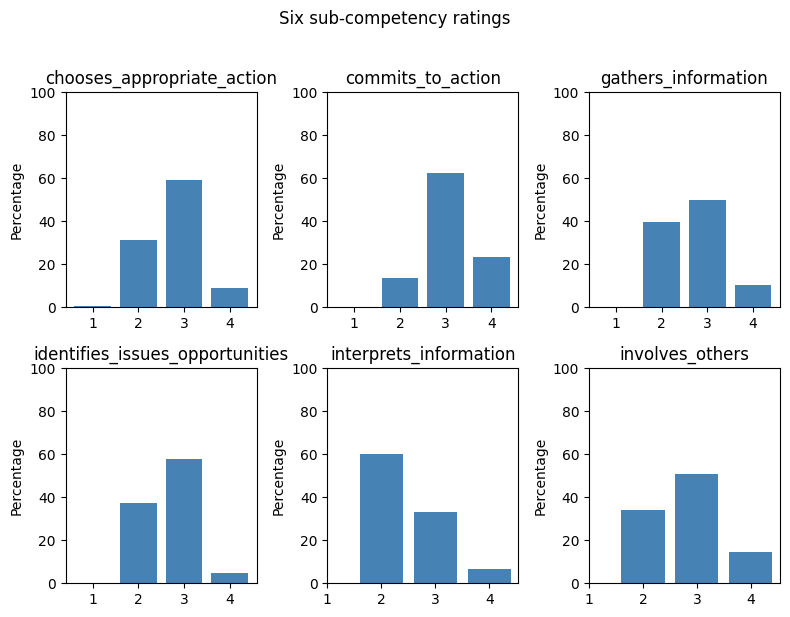

In [ ]:
# Plot the six indicator ratings
ratings_columns = [col for col in data.columns if col.startswith('rating_')]
ratings_data = data[ratings_columns]
ratings_data.columns = ratings_data.columns.str.replace('rating_', '')

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))

for i, (col, ax) in enumerate(zip(ratings_data.columns[:6], axes.flatten())):
    ax.bar(ratings_data[col].value_counts(normalize=True).sort_index().index,
           ratings_data[col].value_counts(normalize=True).sort_index() * 100,
           color='steelblue')
    ax.set_title(col)
    ax.set_ylabel('Percentage')
    ax.set_xticks([1,2,3,4])
    ax.set_ylim(0,100)

plt.suptitle('Six sub-competency ratings', y=1.02)
plt.tight_layout()
plt.show()

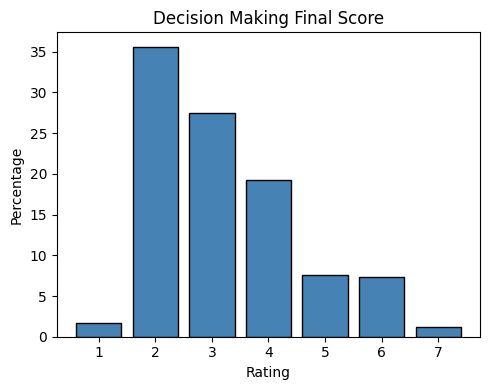

In [ ]:
# Plot the distribution of overall decision-making score
fig, ax = plt.subplots(figsize=(5, 4))

ax.bar(ratings_data['decision_making_final_score'].value_counts(normalize=True).sort_index().index,
       ratings_data['decision_making_final_score'].value_counts(normalize=True).sort_index() * 100,
       color = 'steelblue', edgecolor = 'black')
ax.set_title('Decision Making Final Score', fontsize = 12)
ax.set_ylabel('Percentage', fontsize = 10)
ax.set_xlabel('Rating', fontsize = 10)
ax.set_xticks(list(range(1,8)))
ax.tick_params(axis='both', which='both', labelsize=10)

plt.tight_layout()
plt.show()

## Analysis
#### Pre-Trained Models
Load three pre-trained word embedding models.

**Word2Vec model**: trained on a large corpus of Google News articles, this model contains 300-dimensional vectors for 3 million words and phrases (Mikolov et al., 2013) https://arxiv.org/abs/1310.4546

**GloVe model**: trained on the 6 billion tokens from the English language Wikipedia and the Gigaword5 dataset (https://catalog.ldc.upenn.edu/LDC2011T07), this model contains 300-dimensional vectors  (Pennington, Socher and Manning 2014).

**Fasttest model**: trained on Wikipedia 2017, UMBC webbase corpus, and statmt.org news dataset (16B tokens), comprises 1 million 300-dimensional word vectors https://fasttext.cc/docs/en/english-vectors.html

In [ ]:
from gensim.models import Word2Vec
import gensim.downloader as api

# Load a pre-trained Word2Vec model (e.g., 'word2vec-google-news-300')
#pretrained_model = api.load('word2vec-google-news-300')

In [ ]:
# Save the model for easier loading next time
#pretrained_model.save(f'{file_path}pretrained_w2v_google300')

In [ ]:
# load a saved pretrained model
from gensim.models import KeyedVectors
pretrained_model = KeyedVectors.load(f'{file_path}pretrained_w2v_google300', mmap='r')

In [ ]:
type(pretrained_model)

gensim.models.keyedvectors.KeyedVectors

In [ ]:
pretrained_model.__contains__("database")

True

In [ ]:
pretrained_model.similarity("careful", "cautious")

0.64839727

In [ ]:
# Load a pretrained GloVe word embeddings model
#pretrained_model_glove = api.load("glove-wiki-gigaword-300")

In [ ]:
# Save the model for easier loading next time
#pretrained_glove.save(f'{file_path}pretrained_glove_wiki300')

In [ ]:
# Load the model from the file
pretrained_glove = KeyedVectors.load(f'{file_path}pretrained_glove_wiki300', mmap='r')

In [ ]:
# Load a pretrained Fastext subword embeddings model
#pretrained_fasttext = api.load("fasttext-wiki-news-subwords-300")

In [ ]:
# Save the model for easier loading next time
#pretrained_fasttext.save(f'{file_path}pretrained_fasttext300')

In [ ]:
# Load the model from the file
pretrained_fasttext = KeyedVectors.load(f'{file_path}pretrained_fasttext300', mmap='r')

### Visualisation of word vectors for demonstration

Use t-SNE to visualise high-dimensional vectors in low-dimensional space.

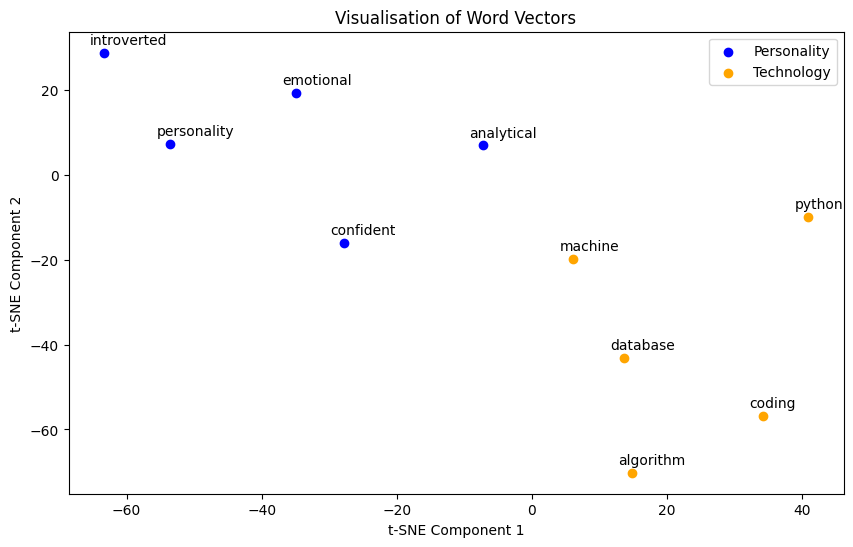

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

# Sample of words related to personality and technology
personality_words = ["emotional", "introverted", "confident", "analytical", "personality"]
tech_words = ["algorithm", "machine", "database", "python", "coding"]
sample_words = personality_words + tech_words

# Word vectorisation using pre-trained w2v model
sample_vectors = [pretrained_model[word] for word in sample_words if word in pretrained_model]
sample_vectors = np.array(sample_vectors)

# Dimensionality reduction using t-SNE
tsne_model = TSNE(n_components=2, perplexity=5, random_state=10)
tsne_result = tsne_model.fit_transform(sample_vectors)

# Plot results
plt.figure(figsize=(10, 6))

plt.scatter(tsne_result[:5, 0], tsne_result[:5, 1], color='blue', label='Personality')
plt.scatter(tsne_result[5:, 0], tsne_result[5:, 1], color='orange', label='Technology')

# Annotate each point with the corresponding word
for i, word in enumerate(sample_words):
    plt.annotate(word, (tsne_result[i, 0] - 2, tsne_result[i, 1] + 2))

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Visualisation of Word Vectors')
plt.legend()

plt.show()

#### Similarity metrics

Cosine similarity and 1- Word Mover's Distance (WMD) are used to calculate similarity between the word embedding vectors. Two variations of Cosine similarity are calculated based on different representations of the text. As WMD measures distance betwen vectors, the value is multiplied by -1 to provide a similarity score.

The three described similarity scores are calculated for each of the pre-trained word embedding models, totalling six similarity scores to be evaluated.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate cosine similarity between two texts (average vectors)
def calculate_cosine_similarity(text1, text2, nlp_model):
    text1_vectors = [nlp_model[word] for word in text1 if word in nlp_model]
    text2_vectors = [nlp_model[word] for word in text2 if word in nlp_model]

    if not text1_vectors or not text2_vectors:
        return 0.0  # Handle cases where there are no word vectors available

    # Calculate the mean vectors for text1 and text2
    mean_vector1 = np.mean(text1_vectors, axis=0)
    mean_vector2 = np.mean(text2_vectors, axis=0)

    # Calculate cosine similarity between the mean vectors
    similarity = cosine_similarity([mean_vector1], [mean_vector2])

    return similarity[0][0]  # Return the similarity score

In [ ]:
from scipy.spatial import distance

# Function to calculate Euclidean distance between two texts (average vectors)
def euclidean_distance(text1, text2, nlp_model):
    text1_vectors = [nlp_model[word] for word in text1 if word in nlp_model]
    text2_vectors = [nlp_model[word] for word in text2 if word in nlp_model]

    if not text1_vectors or not text2_vectors:
        return 0.0  # Handle cases where there are no word vectors available

    # Calculate the mean vectors for text1 and text2
    mean_vector1 = np.mean(text1_vectors, axis=0)
    mean_vector2 = np.mean(text2_vectors, axis=0)

    # Calculate negative Euclidean distance between the mean vectors
    similarity = - distance.euclidean(mean_vector1, mean_vector2)

    return similarity  # Return the similarity score

#### For each word embedding model, calculate semantic similarity between all texts and the target text using the three similarity metrics

In [ ]:
# Cosine similarity
data['sim_w2v_cosine'] = data['tokenized_text'].apply(lambda x: calculate_cosine_similarity(x, target_text_tokens, pretrained_model))
data['sim_glove_cosine'] = data['tokenized_text'].apply(lambda x: calculate_cosine_similarity(x, target_text_tokens, pretrained_glove))
data['sim_fast_cosine'] = data['tokenized_text'].apply(lambda x: calculate_cosine_similarity(x, target_text_tokens, pretrained_fasttext))

In [ ]:
# Euclidean similarity
data['sim_w2v_euclidean'] = data['tokenized_text'].apply(lambda x: euclidean_distance(x, target_text_tokens, pretrained_model))
data['sim_glove_euclidean'] = data['tokenized_text'].apply(lambda x: euclidean_distance(x, target_text_tokens, pretrained_glove))
data['sim_fast_euclidean'] = data['tokenized_text'].apply(lambda x: euclidean_distance(x, target_text_tokens, pretrained_fasttext))

In [ ]:
# Negative Word Mover's Distance
data['sim_w2v_wmd'] = data['tokenized_text'].apply(lambda x: - pretrained_model.wmdistance(x, target_text_tokens))
data['sim_glove_wmd'] = data['tokenized_text'].apply(lambda x: - pretrained_glove.wmdistance(x, target_text_tokens))
data['sim_fast_wmd'] = data['tokenized_text'].apply(lambda x: - pretrained_fasttext.wmdistance(x, target_text_tokens))

### Evaluate the results

In [ ]:
summary_statistics = data.filter(regex='^sim').describe()
print(summary_statistics)

       sim_w2v_cosine  sim_glove_cosine  sim_fast_cosine  sim_w2v_euclidean  \
count     1466.000000       1466.000000      1466.000000        1466.000000   
mean         0.679288          0.757767         0.866365          -0.783799   
std          0.046193          0.033405         0.045430           0.052404   
min          0.368812          0.446742         0.235892          -1.159337   
25%          0.656016          0.740748         0.853249          -0.809079   
50%          0.684640          0.761566         0.876094          -0.777987   
75%          0.711387          0.779749         0.892887          -0.748503   
max          0.786198          0.843556         0.928998          -0.657482   

       sim_glove_euclidean  sim_fast_euclidean  sim_w2v_wmd  sim_glove_wmd  \
count          1466.000000         1466.000000  1466.000000    1466.000000   
mean             -1.804743           -0.267424    -1.164372      -1.103552   
std               0.120192            0.044425     0.0

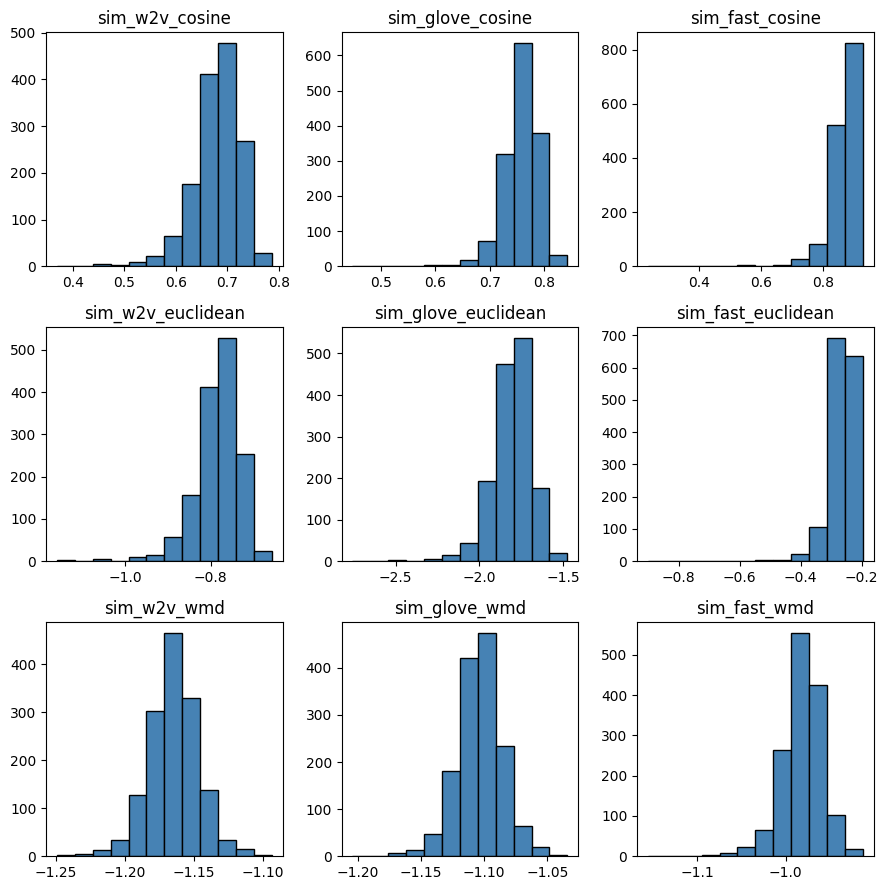

In [ ]:
# Select the scores with column names starting with 'sim_'
sim_scores = data.filter(regex='^sim_')

# Create a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(9,9))

# Flatten the 2D array of subplots for easier iteration
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(sim_scores.columns):
    axes[i].hist(sim_scores[col], bins=12, color='steelblue', edgecolor='black')
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()


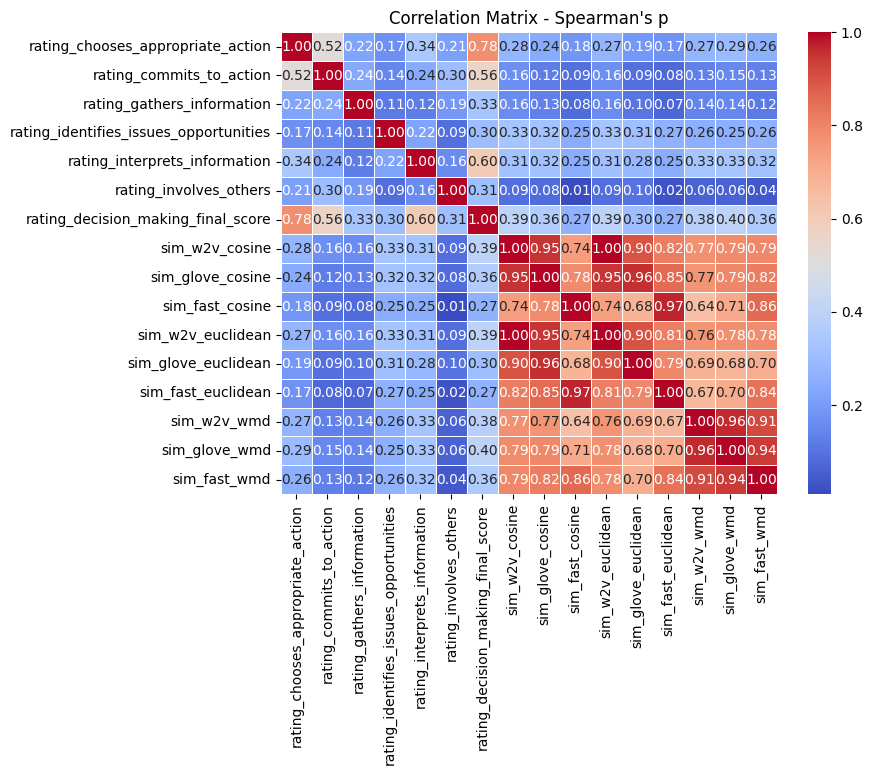

In [ ]:
# Plot relationship between all ratings and similarity scores - Non-parametric Spearman's rho
import seaborn as sns

# Exclude non-numeric columns
numeric_data = data[data['text_exercise_final_clean'].str.strip() != ""].select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr(method = 'spearman')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix - Spearman's p")
plt.show()

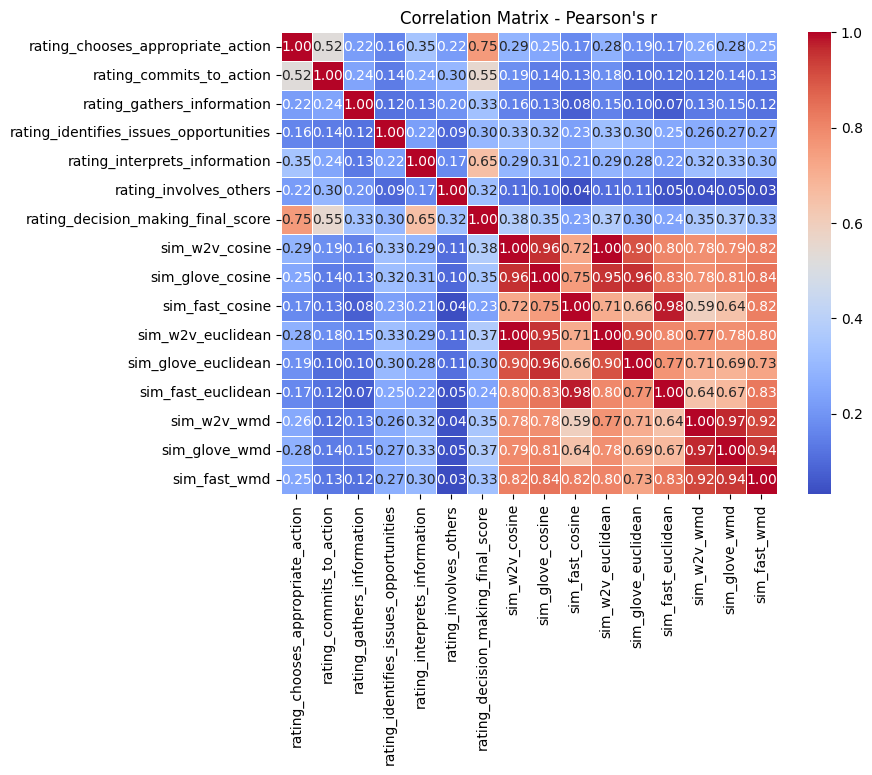

In [ ]:
# Plot relationship between all ratings and similarity scores - Pearson's r

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr(method = 'pearson')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix - Pearson's r")
plt.show()

### Evaluation metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

model_names = ['w2v_cosine', 'w2v_euclidean', 'w2v_wmd', 'glove_cosine', 'glove_euclidean', 'glove_wmd', 'fast_cosine', 'fast_euclidean', 'fast_wmd']

metrics_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC-AUC': []}

# Convert to binary
numeric_data['human_binary'] = (numeric_data['rating_decision_making_final_score'] > 3.5).astype(int)
for model_name in model_names:
   numeric_data[f'bin_{model_name}'] = (numeric_data[f'sim_{model_name}'] > numeric_data[f'sim_{model_name}'].median()).astype(int)
   #numeric_data[f'bin_{model_name}'] = (numeric_data[f'sim_{model_name}'] > .5).astype(int)

# Evaluate each model
for model_name in model_names:
    # Get predictions for the current model
    predictions = numeric_data[f'bin_{model_name}']
    # Actual y values
    human_binary = numeric_data['human_binary']

    # Calculate metrics
    accuracy = accuracy_score(human_binary, predictions)
    precision = precision_score(human_binary, predictions)
    recall = recall_score(human_binary, predictions)
    f1 = f1_score(human_binary, predictions)
    roc_auc = roc_auc_score(human_binary, predictions)

    # Update the metrics dictionary
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)
    metrics_dict['ROC-AUC'].append(roc_auc)

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Display the table
print(metrics_df)


             Model  Accuracy  Precision  Recall  F1 Score   ROC-AUC
0       w2v_cosine  0.639444   0.486957  0.7000  0.574359  0.653595
1    w2v_euclidean  0.637706   0.485217  0.6975  0.572308  0.651679
2          w2v_wmd  0.641182   0.488696  0.7025  0.576410  0.655511
3     glove_cosine  0.625543   0.473043  0.6800  0.557949  0.638269
4  glove_euclidean  0.611642   0.459130  0.6600  0.541538  0.622943
5        glove_wmd  0.641182   0.488696  0.7025  0.576410  0.655511
6      fast_cosine  0.609904   0.457391  0.6575  0.539487  0.621027
7   fast_euclidean  0.608167   0.455652  0.6550  0.537436  0.619111
8         fast_wmd  0.622068   0.469565  0.6750  0.553846  0.634437


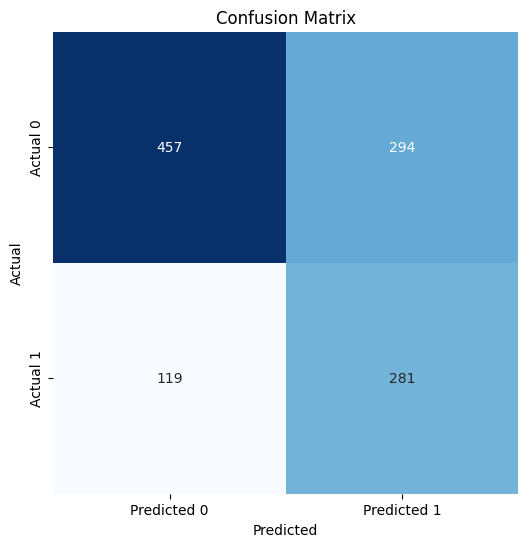

In [ ]:
y_true = numeric_data['human_binary']
y_pred = numeric_data['bin_glove_wmd']

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model_names = ['w2v_cosine', 'w2v_euclidean', 'w2v_wmd', 'glove_cosine', 'glove_euclidean', 'glove_wmd', 'fast_cosine', 'fast_euclidean', 'fast_wmd']

model_names = ['rating_gathers_information']


metrics_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC-AUC': []}

for model_name in model_names:
    # Get predictions for the current model
    #predictions = (numeric_data[f'sim_{model_name}'] > numeric_data[f'sim_{model_name}'].quantile(0.33)).astype(int)
    predictions = (numeric_data[f'{model_name}'] > 2.5).astype(int)

    # Actual y values
    human_binary = (numeric_data['rating_decision_making_final_score'] > 3.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(human_binary, predictions)
    precision = precision_score(human_binary, predictions)
    recall = recall_score(human_binary, predictions)
    f1 = f1_score(human_binary, predictions)
    roc_auc = roc_auc_score(human_binary, predictions)

    # Update the metrics dictionary
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)
    metrics_dict['ROC-AUC'].append(roc_auc)

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Display the table
print(metrics_df)


                        Model  Accuracy  Precision  Recall  F1 Score   ROC-AUC
0  rating_gathers_information  0.590791   0.449788   0.795  0.574526  0.638512


In [ ]:
model_names = ['w2v_cosine', 'w2v_euclidean', 'w2v_wmd', 'glove_cosine', 'glove_euclidean', 'glove_wmd', 'fast_cosine', 'fast_euclidean', 'fast_wmd']

metrics_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC-AUC': []}

for model_name in model_names:
    # Get predictions for the current model
    #predictions = (numeric_data[f'sim_{model_name}'] > numeric_data[f'sim_{model_name}'].quantile(0.33)).astype(int)
    predictions = (numeric_data[f'sim_{model_name}'] > .6).astype(int)

    # Actual y values
    human_binary = (numeric_data['rating_decision_making_final_score'] > 3.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(human_binary, predictions)
    precision = precision_score(human_binary, predictions)
    recall = recall_score(human_binary, predictions)
    f1 = f1_score(human_binary, predictions)
    roc_auc = roc_auc_score(human_binary, predictions)

    # Update the metrics dictionary
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)
    metrics_dict['ROC-AUC'].append(roc_auc)

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Display the table
print(metrics_df)


             Model  Accuracy  Precision  Recall  F1 Score   ROC-AUC
0       w2v_cosine  0.364031   0.352837   0.995  0.520942  0.511481
1    w2v_euclidean  0.652476   0.000000   0.000  0.000000  0.500000
2          w2v_wmd  0.652476   0.000000   0.000  0.000000  0.500000
3     glove_cosine  0.347524   0.347524   1.000  0.515796  0.500000
4  glove_euclidean  0.652476   0.000000   0.000  0.000000  0.500000
5        glove_wmd  0.652476   0.000000   0.000  0.000000  0.500000
6      fast_cosine  0.349262   0.348129   1.000  0.516462  0.501332
7   fast_euclidean  0.652476   0.000000   0.000  0.000000  0.500000
8         fast_wmd  0.652476   0.000000   0.000  0.000000  0.500000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [ ]:
# Rescale all similarity scores to 0-1
from sklearn.preprocessing import MinMaxScaler

sim_columns = numeric_data.filter(regex='^sim_')
numeric_data.loc[:, sim_columns.columns] = MinMaxScaler().fit_transform(sim_columns)


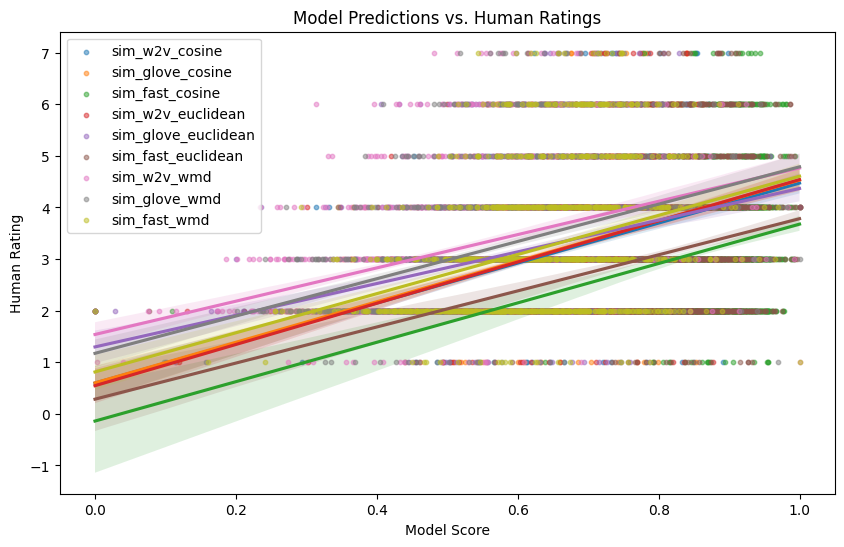

In [ ]:
# Create a single plot with regression lines for each predictor
fig, ax = plt.subplots(figsize=(10, 6))
for predictor in sim_columns.columns:
    sns.regplot(data=numeric_data, x=predictor, y='rating_decision_making_final_score', scatter=True, label=predictor, scatter_kws={'s': 10, 'alpha': 0.5})

ax.set_title('Model Predictions vs. Human Ratings', fontsize = 12)
ax.set_ylabel('Human Rating', fontsize = 10)
ax.set_xlabel('Model Score', fontsize = 10)

plt.legend()
plt.show()

<ipython-input-52-c1b370df5e80>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['human_binary'] = df['rating_decision_making_final_score'].apply(lambda x: convert_to_binary(x, median_rating))
<ipython-input-52-c1b370df5e80>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['human_rating'] = df['rating_decision_making_final_score']
<ipython-input-52-c1b370df5e80>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

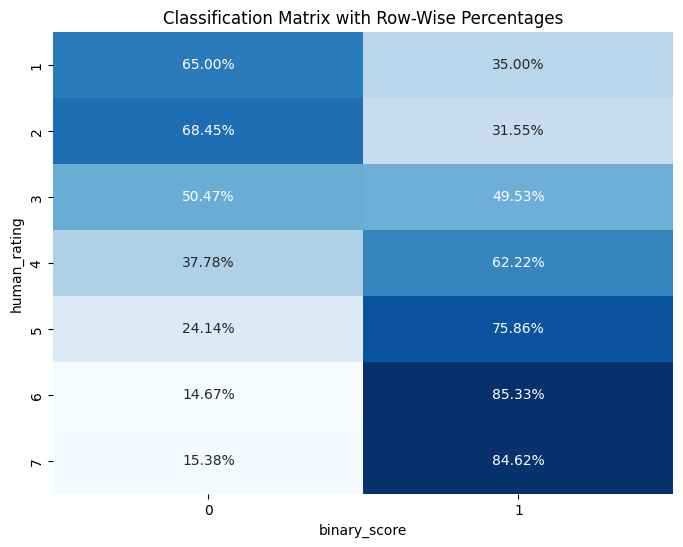

In [ ]:
df = numeric_data[['rating_decision_making_final_score', 'sim_glove_wmd']]

# Define a function to convert values to binary based on median
def convert_to_binary(value, median):
    return 1 if value >= median else 0

# Calculate the median for "rating" and "score" columns
#median_rating = df['rating_decision_making_final_score'].median()
median_rating = 3.5
median_score = df['sim_glove_wmd'].median()

# Convert "rating" and "score" to binary columns based on median
df['human_binary'] = df['rating_decision_making_final_score'].apply(lambda x: convert_to_binary(x, median_rating))
df['human_rating'] = df['rating_decision_making_final_score']
df['binary_score'] = df['sim_glove_wmd'].apply(lambda x: convert_to_binary(x, median_score))

# Compute the confusion matrix
confusion_matrix = pd.crosstab(df['human_rating'], df['binary_score'], normalize='index')  # Normalise along rows

# Create a heatmap to visualise the confusion matrix with row-wise percentages
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt=".2%", cmap="Blues", cbar=False)  # Format as percentages
plt.title('Classification Matrix with Row-Wise Percentages')
plt.show()



Accuracy: 0.64
Precision: 0.49
Recall: 0.70
F1-Score: 0.58
AUC-ROC: 0.65


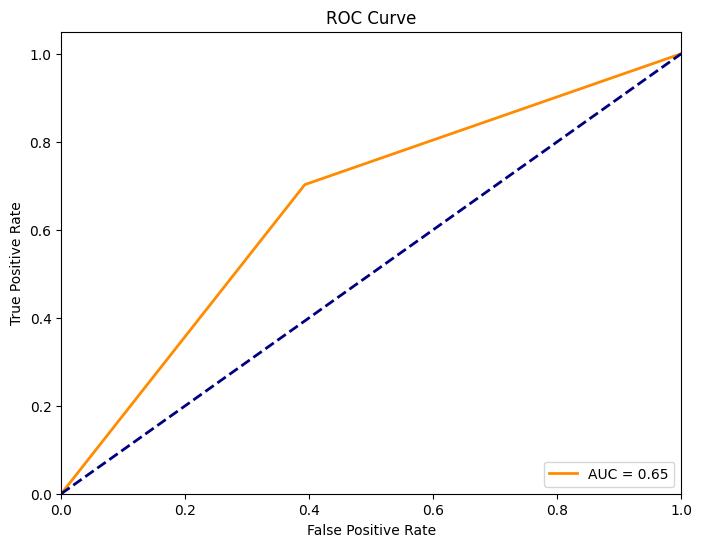

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Assuming you have ground truth labels 'y_true' and predicted labels 'y_pred'
y_true = df['human_binary']
y_pred = df['binary_score']

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

# Create a ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

